In [31]:
import os
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
# import joblib
# from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
# import xgboost as xgb
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import GridSearchCV

import pickle

import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [42]:
df = pd.read_csv("../data/Drumsticks - BatDatacsv.csv")
df.columns

Index(['ID', 'GameFormat', 'SR', 'BattingInnings', 'IsOut', 'Opposition',
       'Ground', 'TossResult', 'MatchTime', 'isTossWon', 'Fantasy',
       'isHomeGround', 'GroundWL', 'GroundRPO', 'GroundAvg', 'TossWL',
       'TossRPO', 'TossAvg', 'inningsWL', 'inningsRPO', 'inningsAverage',
       'Average', 'Innings', 'Centuries', 'Fifties', 'Zeros', 'Consistency',
       'Form', 'Venue', 'Opps', 'MaxTemp', 'MinTemp', 'MaxWind', 'Tournament',
       'BattingOrder', 'Role', 'Country', 'Batting Hand', 'Age'],
      dtype='object')

In [43]:
df

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,28081,6,0.000000,2,1,South Africa,Johannesburg,bat,night,0,...,1.0927,25.3,13.6,15.9,Bilateral,2,WK,India,RHB,25
1,28081,3,0.000000,2,1,South Africa,Johannesburg,bat,night,0,...,1.0927,25.3,13.6,15.9,Bilateral,2,WK,India,RHB,25
2,44828,6,0.000000,2,1,Eagles,Centurion,bat,day,0,...,1.0927,32.6,16.5,24.5,Other,1,BAT,South Africa,RHB,23
3,44828,6,173.684211,1,1,Warriors,Gqeberha,bat,night,1,...,1.0927,25.5,20.3,28.6,Other,1,BAT,South Africa,RHB,23
4,44828,6,150.000000,2,1,Cape Cobras,Cape Town,bat,night,0,...,1.0927,27.9,17.3,26.7,Other,1,BAT,South Africa,RHB,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24273,600498,6,134.407849,2,1,MI Cape Town,Johannesburg,bat,daynight,0,...,3.0623,26.5,14.4,10.4,SA20,2,BAT,South African,RHB,31
24274,696401,6,142.971888,2,1,MI Cape Town,Johannesburg,bat,daynight,0,...,3.0623,26.5,14.4,10.4,SA20,3,ALL,South Africa,RHB,25
24275,662973,6,133.974558,1,0,DC,Dubai (DICS),field,night,0,...,3.5755,22.9,19.1,18.6,T20 Tournament,2,ALL,England,LHB,27
24276,820351,6,138.502446,2,1,Vipers,Dubai (DICS),field,night,1,...,3.4015,22.9,19.1,18.6,T20 Tournament,2,BAT,West Indies,RHB,32


In [44]:
y = df["Fantasy"]
df.drop("Fantasy", axis = 1, inplace = True)
y = pd.DataFrame(y)

In [45]:
y.loc[y["Fantasy"] < 0, "Fantasy_Class"] = 1
y.loc[(y["Fantasy"] < 40) & (y["Fantasy"] >= 0), "Fantasy_Class"] = 2
y.loc[(y["Fantasy"] < 80) & (y["Fantasy"] >= 40), "Fantasy_Class"] = 3
y.loc[(y["Fantasy"] < 120) & (y["Fantasy"] >= 80), "Fantasy_Class"] = 4
y.loc[y["Fantasy"] >= 120, "Fantasy_Class"] = 5

In [46]:
encoder_y = LabelEncoder()
y["Fantasy_Class"] = encoder_y.fit_transform(y["Fantasy_Class"])
y.drop("Fantasy", axis = 1, inplace = True)

# Saving the encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder_y, f)

# Loading the encoder
with open('label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

In [47]:
y

,Fantasy_Class
0,0
1,0
2,2
3,0
4,1
...,...
24273,1
24274,1
24275,4
24276,4


In [48]:
cols = ['ID', 'Opposition', 'Ground', 'TossResult', 'MatchTime', 'Tournament', 'Role',
       'Country', 'Batting Hand']

encoders = {}  # Dictionary to store encoders

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store the encoder for the column

# Save all encoders to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [49]:
# Apply log scaling to TossAvg and inningsAverage
# df['TossAvg'] = np.log1p(df['TossAvg'])  # Log scaling for TossAvg
# df['inningsAverage'] = np.log1p(df['inningsAverage'])  # Log scaling for inningsAverage

# Any log scaling is not needed. It increases the skewness

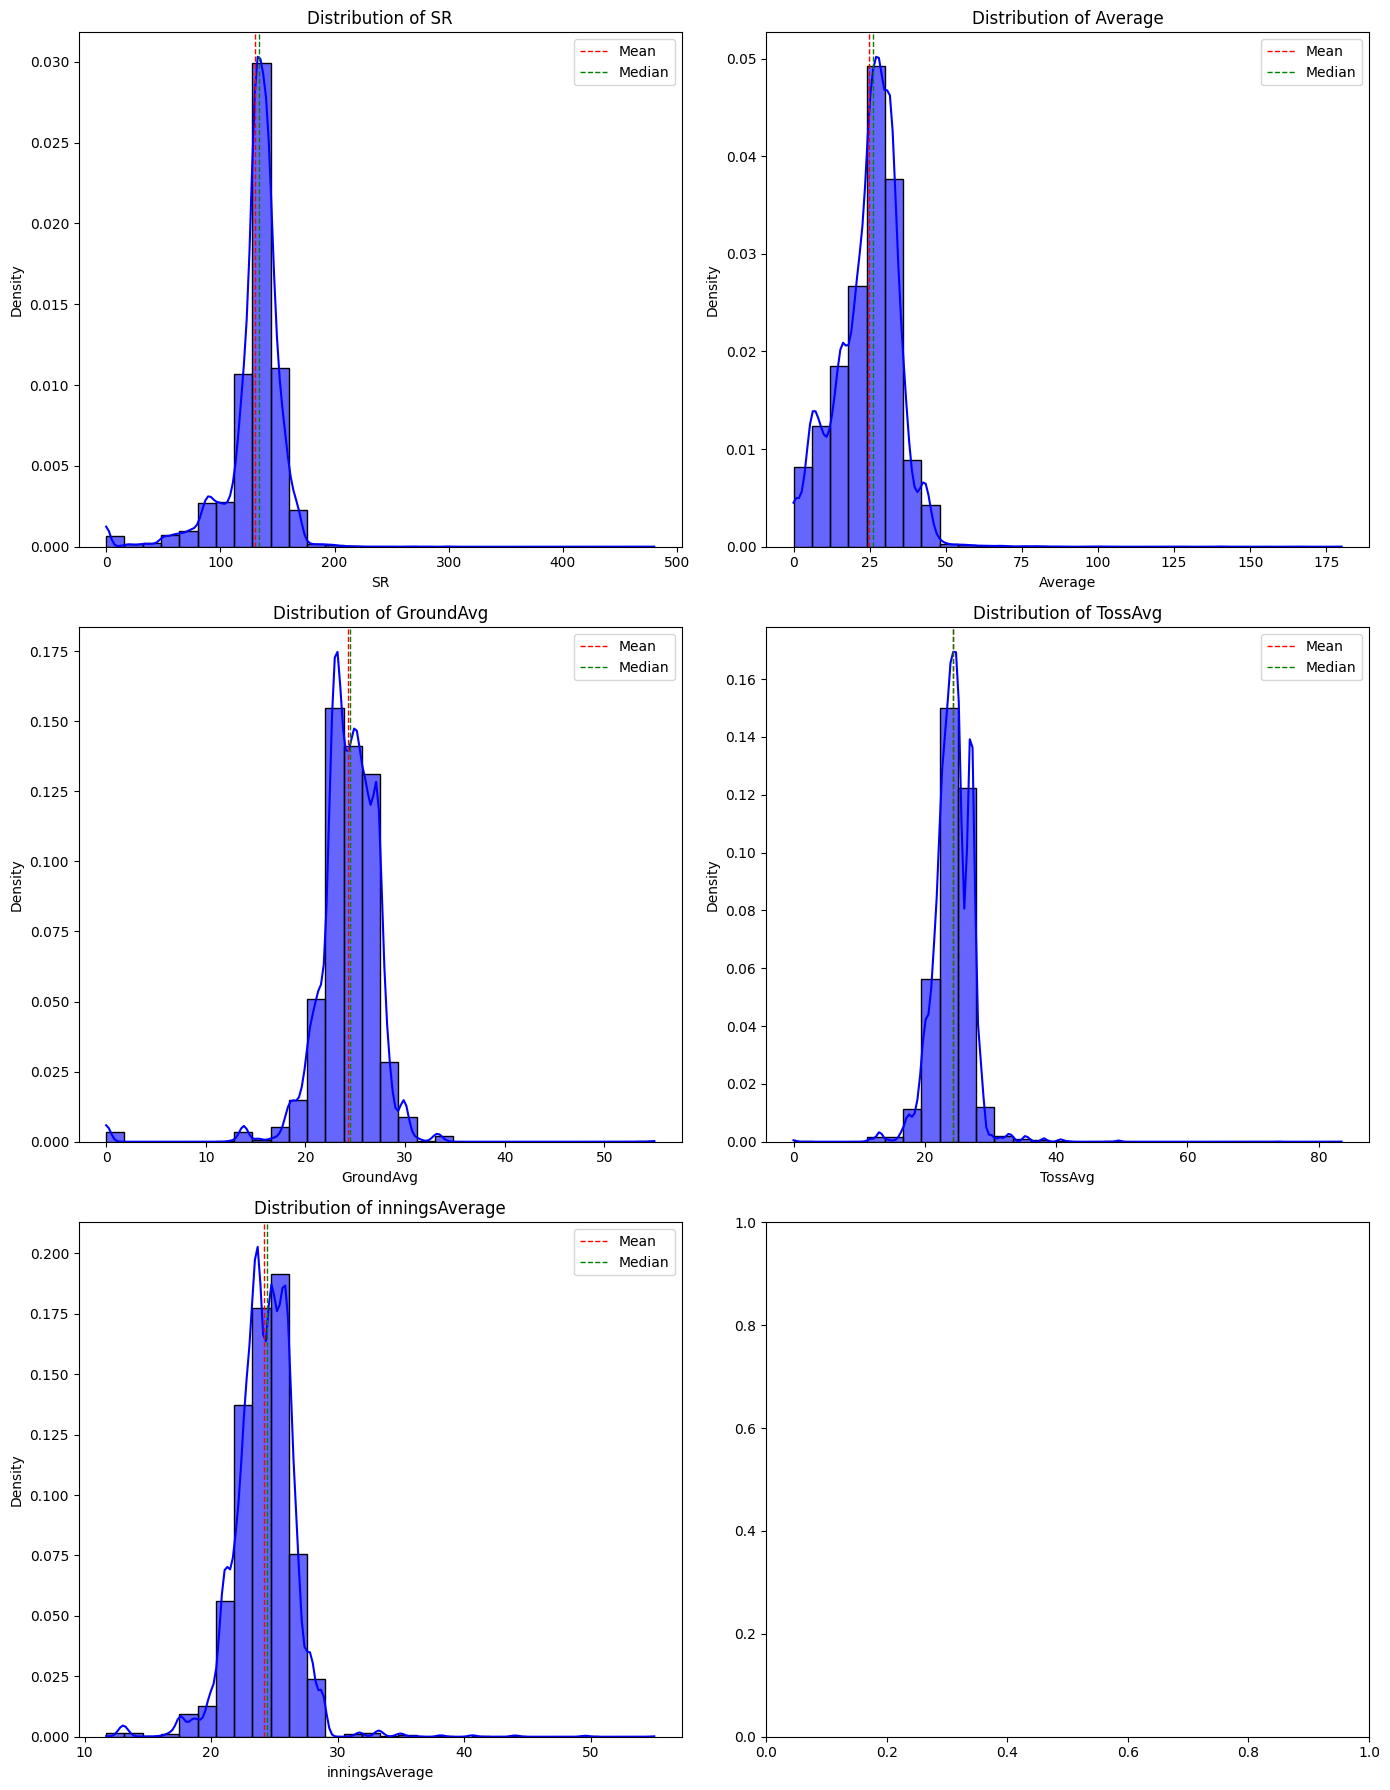

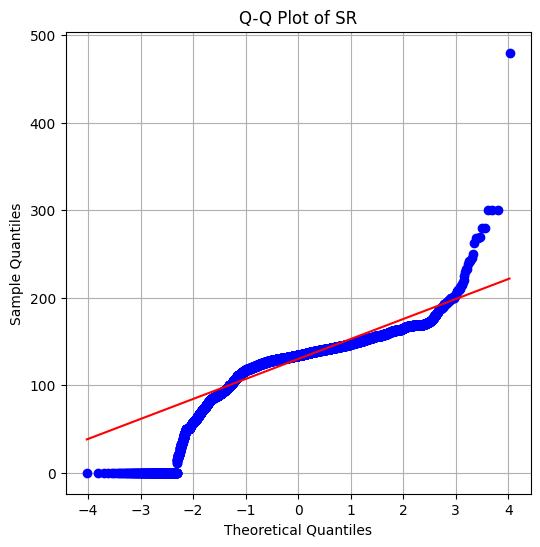

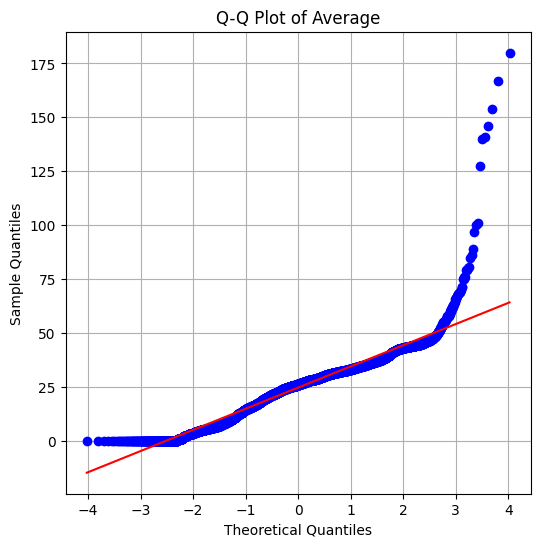

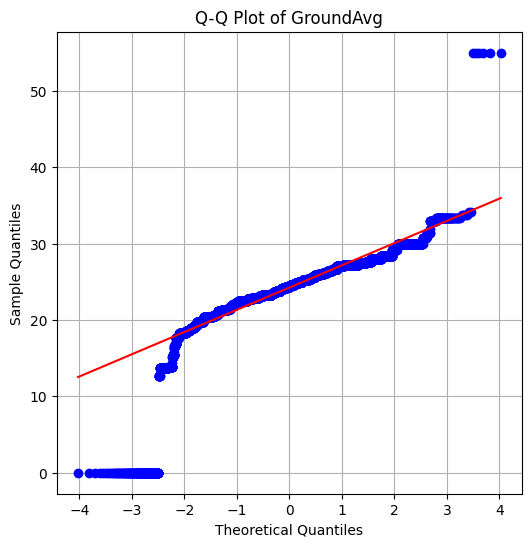

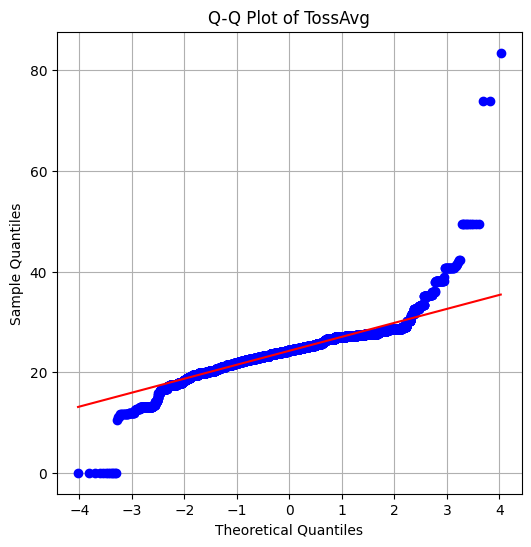

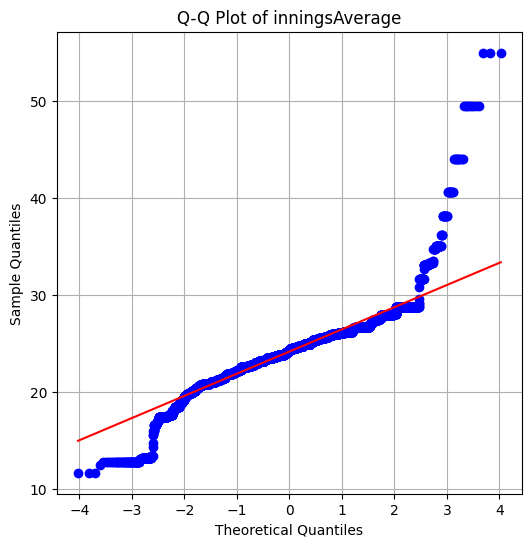

Skewness for SR: -1.9515
Skewness for Average: 0.3810
Skewness for GroundAvg: -2.5798
Skewness for TossAvg: 0.7329
Skewness for inningsAverage: 0.6538


In [50]:
# List of features to analyze
features = ['SR', 'Average', 'GroundAvg', 'TossAvg', 'inningsAverage']  # Replace with your actual feature names

# Set up the number of rows and columns for subplots
num_features = len(features)
cols = 2
rows = (num_features + 1) // cols  # Calculate number of rows needed

# Create a figure for histograms and density plots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 6))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(features):
    # Histogram and Density Plot
    sns.histplot(df[feature], bins=30, kde=True, color='blue', stat='density', alpha=0.6, ax=axes[i])
    axes[i].axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    axes[i].axvline(df[feature].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Adjust layout for histogram plots
plt.tight_layout()
plt.show()

# Create Q-Q plots in separate figures
for feature in features:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid()
    plt.show()

# Calculate and print skewness for each feature
for feature in features:
    skewness_pandas = df[feature].skew()
    print(f"Skewness for {feature}: {skewness_pandas:.4f}")

In [51]:
# Check the distribution of classes
class_distribution = y.value_counts()

# Print the class distribution
print("Class distribution in y_train:")
print(class_distribution)

# Optionally, calculate the percentage of each class
class_percentage = y.value_counts(normalize=True) * 100
print("\nClass percentage in y_train:")
print(class_percentage)

Class distribution in y_train:
Fantasy_Class
1                12054
2                 5170
0                 3097
3                 2253
4                 1704
Name: count, dtype: int64

Class percentage in y_train:
Fantasy_Class
1                49.649889
2                21.295000
0                12.756405
3                 9.280007
4                 7.018700
Name: proportion, dtype: float64


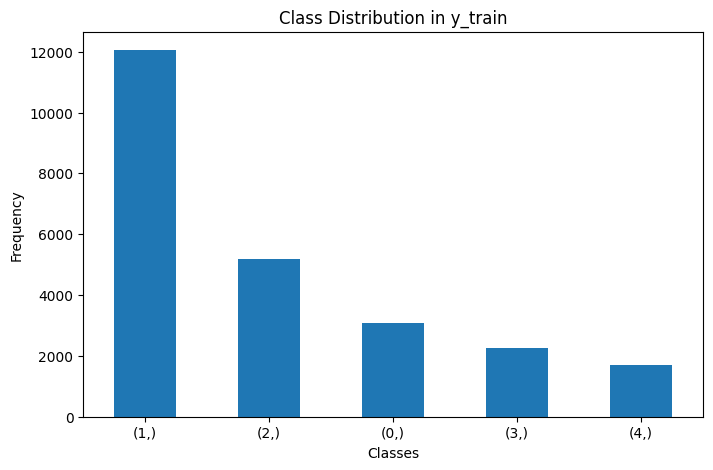

In [52]:
# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in y_train')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(df, y)

In [54]:
x_resampled

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,2,6,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
1,2,3,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
2,5,6,0.000000,2,1,66,36,0,0,0,...,1.092700,32.600000,16.500000,24.500000,6,1,1,8,1,23
3,5,6,173.684211,1,1,281,75,0,2,1,...,1.092700,25.500000,20.300000,28.600000,6,1,1,8,1,23
4,5,6,150.000000,2,1,40,33,0,2,0,...,1.092700,27.900000,17.300000,26.700000,6,1,1,8,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60265,63,6,140.981023,1,1,72,171,1,0,0,...,3.683142,28.493600,25.776797,21.231182,1,1,3,10,0,27
60266,20,5,152.679861,1,0,233,34,0,2,0,...,3.991092,24.892207,19.405793,19.323327,0,1,0,1,1,31
60267,14,6,115.326917,1,0,134,90,0,2,0,...,1.955449,37.548377,21.355992,11.667415,4,1,1,5,1,24
60268,67,6,137.652035,2,1,103,161,0,0,0,...,4.032038,30.263593,25.968204,18.965270,1,1,3,9,0,27


In [55]:
x_resampled

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,2,6,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
1,2,3,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
2,5,6,0.000000,2,1,66,36,0,0,0,...,1.092700,32.600000,16.500000,24.500000,6,1,1,8,1,23
3,5,6,173.684211,1,1,281,75,0,2,1,...,1.092700,25.500000,20.300000,28.600000,6,1,1,8,1,23
4,5,6,150.000000,2,1,40,33,0,2,0,...,1.092700,27.900000,17.300000,26.700000,6,1,1,8,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60265,63,6,140.981023,1,1,72,171,1,0,0,...,3.683142,28.493600,25.776797,21.231182,1,1,3,10,0,27
60266,20,5,152.679861,1,0,233,34,0,2,0,...,3.991092,24.892207,19.405793,19.323327,0,1,0,1,1,31
60267,14,6,115.326917,1,0,134,90,0,2,0,...,1.955449,37.548377,21.355992,11.667415,4,1,1,5,1,24
60268,67,6,137.652035,2,1,103,161,0,0,0,...,4.032038,30.263593,25.968204,18.965270,1,1,3,9,0,27


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.1, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [57]:
# Check the distribution of classes
class_distribution = y_resampled.value_counts()

# Print the class distribution
print("Class distribution in y_train:")
print(class_distribution)

# Optionally, calculate the percentage of each class
class_percentage = y_resampled.value_counts(normalize=True) * 100
print("\nClass percentage in y_train:")
print(class_percentage)

Class distribution in y_train:
Fantasy_Class
0                12054
1                12054
2                12054
3                12054
4                12054
Name: count, dtype: int64

Class percentage in y_train:
Fantasy_Class
0                20.0
1                20.0
2                20.0
3                20.0
4                20.0
Name: proportion, dtype: float64


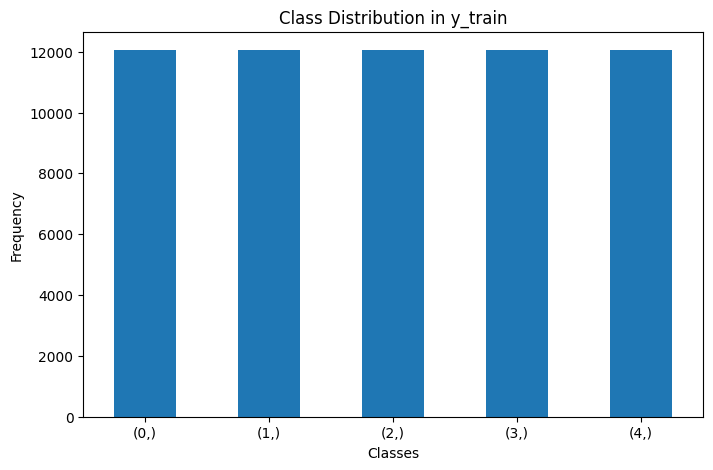

In [58]:
# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in y_train')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()